In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('phone_reviews.csv')

In [9]:
print(data.head())

   Unnamed: 0                                       mobile_names        asin  \
0           0  Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64...  B07HGJJ559   
1           1  Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64...  B07HGJJ559   
2           2  Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64...  B07HGJJ559   
3           3  Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64...  B07HGJJ559   
4           4  Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64...  B07HGJJ559   

                         title  \
0        \nvalue money go it\n   
1                         \n\n   
2  \nbest budget phone india\n   
3   \nbattery life upto mark\n   
4          \nfeeling cheated\n   

                                                body  star  
0   update 15082020never give chance regret go ah...     4  
1        title obviously monsterand good performance     5  
2   brilliant camera huge battery life brilliant ...     5  
3   writing review using 6 daysi bought sumsung p...     3  
4   defec

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Varnika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Varnika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
# Text cleaning function
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

In [13]:
# Apply text cleaning
data['cleaned_review'] = data['body'].apply(clean_text)

In [14]:
# Convert text to vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_review']).toarray()

In [15]:
# Assume binary sentiment labels (0 for negative, 1 for positive) are in the dataset
y = data['star']

In [16]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X = vectorizer.fit_transform(data['cleaned_review']).toarray()

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [19]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
# Predict on test data
y_pred = model.predict(X_test)

In [21]:
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9765217391304348
              precision    recall  f1-score   support

           1       0.98      1.00      0.99      1301
           2       1.00      0.89      0.94       209
           3       0.98      0.97      0.98       325
           4       0.98      0.94      0.96       514
           5       0.97      0.99      0.98      1101

    accuracy                           0.98      3450
   macro avg       0.98      0.96      0.97      3450
weighted avg       0.98      0.98      0.98      3450



In [ ]:
#Topic Modeling

In [22]:
from sklearn.decomposition import LatentDirichletAllocation

In [23]:
# Fit LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda_model.fit_transform(X)

In [24]:
# Print the top words in each topic
terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx + 1}:")
    print([terms[i] for i in topic.argsort()[-10:]])

Topic 1:
['best', 'screen', 'display', 'battery', 'camera', 'samsung', 'price', 'money', 'good', 'phone']
Topic 2:
['mobile', 'quality', 'much', 'like', 'battery', 'camera', 'good', 'phone', 'best', 'price']
Topic 3:
['price', 'problem', 'earphone', 'camera', 'heating', 'battery', 'quality', 'mobile', 'good', 'phone']
Topic 4:
['product', 'amazon', 'redmi', 'wifi', 'mobile', 'battery', 'camera', 'average', 'good', 'phone']
Topic 5:
['worst', 'charging', 'dont', 'good', 'battery', 'defective', 'camera', 'amazon', 'product', 'phone']
Topic 6:
['performance', 'first', 'one', 'product', 'camera', 'quality', 'phone', 'mobile', 'good', 'nice']
Topic 7:
['display', 'replacement', 'days', 'quality', 'battery', 'iphone', 'samsung', 'good', 'camera', 'phone']
Topic 8:
['charging', 'like', 'much', 'use', 'quality', 'touch', 'battery', 'camera', 'good', 'phone']
Topic 9:
['working', 'time', 'days', 'replacement', 'return', 'product', 'good', 'service', 'amazon', 'phone']
Topic 10:
['received', 'ti

In [ ]:
#Customer Segmentation

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [26]:
# Fit KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_segments = kmeans.fit_predict(X)

In [27]:
# Add segment labels to original data
data['segment'] = customer_segments


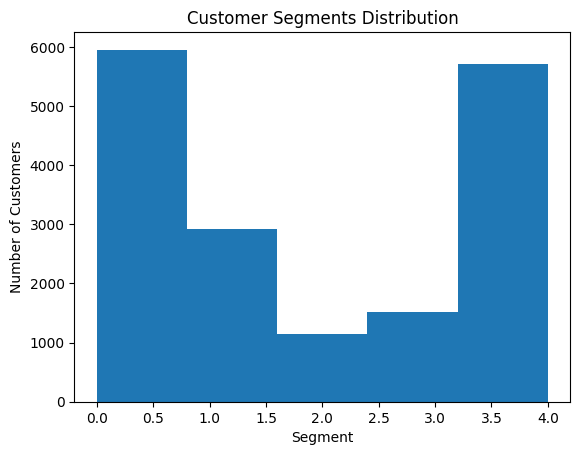

In [28]:
# Plot the distribution of segments
plt.hist(customer_segments, bins=5)
plt.title('Customer Segments Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
#Actionable Insights

In [30]:
# Analyze sentiment distribution across segments
for segment in range(5):
    segment_data = data[data['segment'] == segment]
    print(f"Segment {segment}:")
    print(segment_data['star'].value_counts(normalize=True))
    print()

Segment 0:
1    0.358931
5    0.335574
4    0.147874
2    0.079819
3    0.077802
Name: star, dtype: float64

Segment 1:
1    0.779376
5    0.119904
2    0.051730
4    0.025694
3    0.023296
Name: star, dtype: float64

Segment 2:
1    0.877498
4    0.046916
2    0.034752
3    0.021720
5    0.019114
Name: star, dtype: float64

Segment 3:
5    0.427913
1    0.278473
4    0.166557
3    0.103357
2    0.023700
Name: star, dtype: float64

Segment 4:
5    0.433777
4    0.272425
3    0.148914
1    0.097407
2    0.047477
Name: star, dtype: float64



In [ ]:
#Deployment

In [32]:
pip install flask


   ---------------------------------------- 0.0/101.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 kB ? eta -:--:--
   ------------------------ --------------- 61.4/101.7 kB 1.1 MB/s eta 0:00:01
   ------------------------------------ --- 92.2/101.7 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 101.7/101.7 kB 648.9 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from flask import Flask, request, jsonify

In [42]:
app = Flask(__name__)

In [43]:
@app.route('/predict', methods=['POST'])
def predict():
    content = request.json
    cleaned_review = clean_text(content['review'])
    vectorized_review = vectorizer.transform([cleaned_review])
    prediction = model.predict(vectorized_review)
    return jsonify({'sentiment': int(prediction[0])})

In [ ]:
#Continuous Monitoring and Retraining